## Iris Classification

I'm going to begin going over a series of machine learning methods. My primary language is R, but I'm also familiar with Python. I've going over most of these methods in R on my website but now be going through them in Python.

In [1]:
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
iris_dataset = load_iris() 

Here we're splitting the data into two sets, test and train. We'll create the model with train and then see how well it works with the test model.

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'])

In [4]:
iris_dataframe = pd.DataFrame(x_train, columns =  iris_dataset.feature_names)

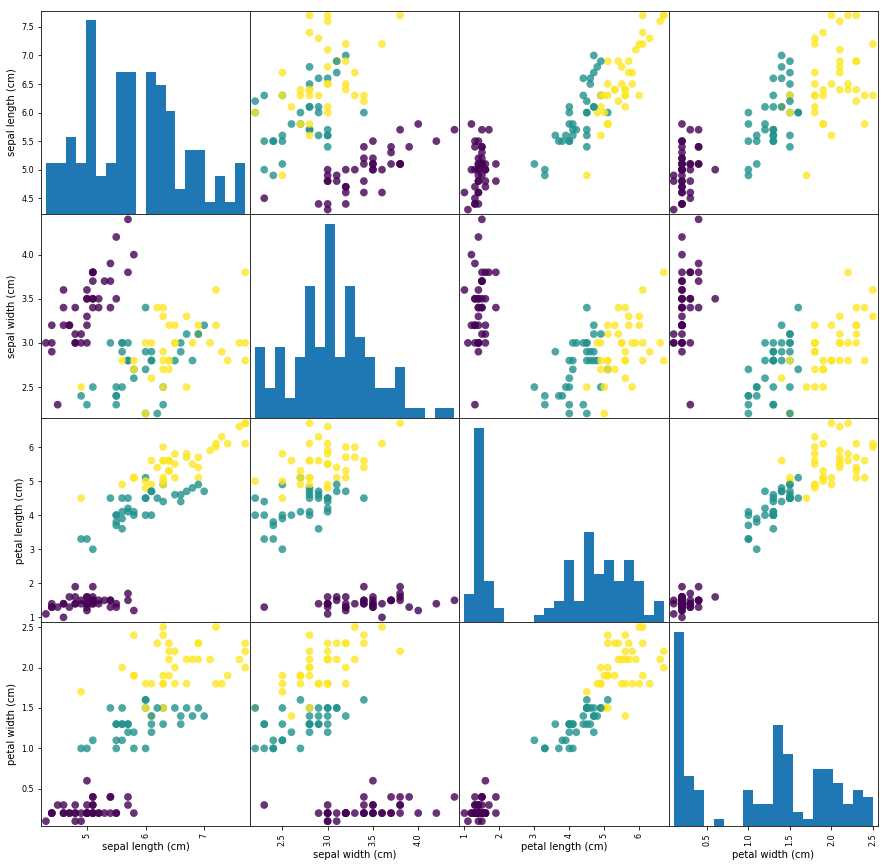

In [5]:
scatter = pd.plotting.scatter_matrix(iris_dataframe, 
                                     c = y_train, 
                                     figsize = (15, 15), 
                                     marker = 'o',
                                     hist_kwds = {'bins': 20}, 
                                     s=60, 
                                     alpha=.8)

In [6]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [7]:
conf_mat = confusion_matrix(y_test, y_pred)

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


We can see below that the classification method did a good job in predicting the outcomes. Of course, the Iris dataset is more or less suitable for every classification method and is thus why it is used so frequently for teaching. Values along the diagonal are correct predictions.

Confusion matrix, without normalization
[[10  0  0]
 [ 0 15  1]
 [ 0  0 12]]


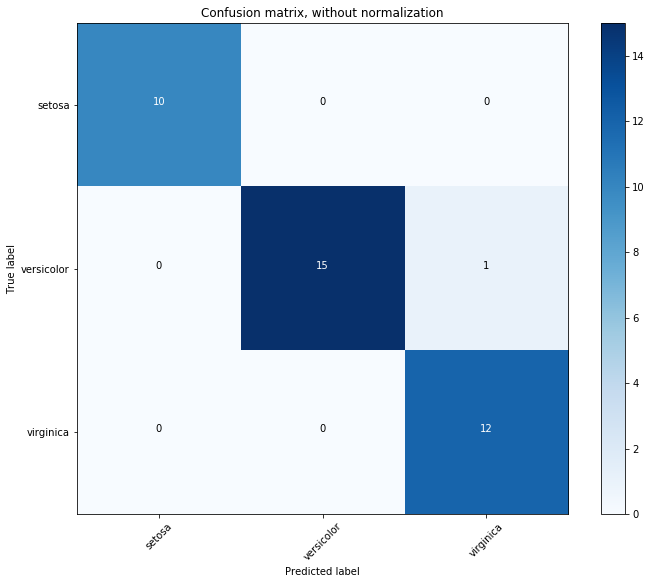

In [9]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
class_names = iris_dataset.target_names
plot_confusion_matrix(conf_mat, classes=class_names,
                      title='Confusion matrix, without normalization')